In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4329.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4223.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4253.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4190.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4354.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4136.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4226.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4214.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4888.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4170.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4323.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4262.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4788.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4657.jpg
/kaggle/input/dogs-cats-images/dataset/test_set/dogs/dog.4387.jpg
/kaggle/in

In [2]:
test_dir="/kaggle/input/dogs-cats-images/dog vs cat/dataset/test_set"
train_dir="/kaggle/input/dogs-cats-images/dog vs cat/dataset/training_set"

train_dir_cats = train_dir + '/cats'
train_dir_dogs = train_dir + '/dogs'
test_dir_cats = test_dir + '/cats'
test_dir_dogs = test_dir + '/dogs'

In [3]:
print('number of cats training images - ',len(os.listdir(train_dir_cats)))
print('number of dogs training images - ',len(os.listdir(train_dir_dogs)))
print('number of cats testing images - ',len(os.listdir(test_dir_cats)))
print('number of dogs testing images - ',len(os.listdir(test_dir_dogs)))

number of cats training images -  4000
number of dogs training images -  4000
number of cats testing images -  1000
number of dogs testing images -  1000


In [4]:
import torch
import torchvision

In [5]:
#data Augumentation
train_transforms =  torchvision.transforms.Compose([
        torchvision.transforms.Resize((224, 224)),
        torchvision.transforms.RandomResizedCrop(224),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
    ])

test_transforms = torchvision.transforms.Compose([   
        torchvision.transforms.Resize((224, 224)),
        torchvision.transforms.ToTensor()
    ])

In [6]:
train_dataset = torchvision.datasets.ImageFolder(root='../input/dogs-cats-images/dataset/training_set/',transform=train_transforms)
test_dataset = torchvision.datasets.ImageFolder(root='../input/dogs-cats-images/dataset/test_set/',transform=test_transforms)

In [7]:
train_size = int(0.8 * len(train_dataset)) 
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

In [8]:
train_dl = torch.utils.data.DataLoader(dataset = train_dataset, batch_size=200, shuffle=True )
val_dl = torch.utils.data.DataLoader(dataset = val_dataset, batch_size=200, shuffle=False)
test_dl = torch.utils.data.DataLoader(dataset = test_dataset, batch_size=200, shuffle=False)

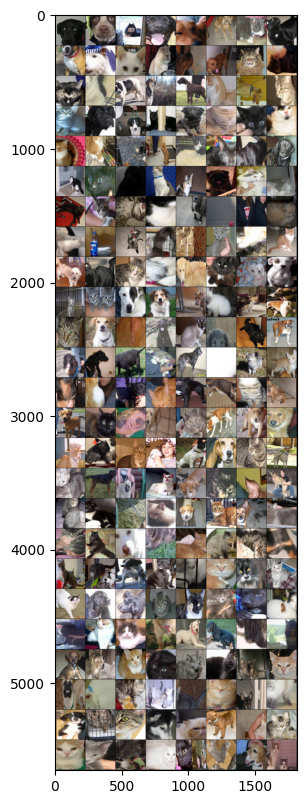

In [9]:
import matplotlib.pyplot as plt
images, labels = next(iter(train_dl))
grid = torchvision.utils.make_grid(images)
plt.figure(figsize=(20, 10), dpi=100)
plt.imshow(grid.numpy().transpose((1, 2, 0)))

In [10]:
labels #0 เป็นแมว 1 เป็นหมา

tensor([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 0])

In [11]:
import torch.nn.functional as F
class MLP_CNN(torch.nn.Module):
    def __init__(self,num_classes,dropout):
        super(MLP_CNN,self).__init__()
        self.cov2d1 = torch.nn.Conv2d(3,32,kernel_size=3)        #สกัด fiter 3 ชั้น
        self.cov2d2 = torch.nn.Conv2d(32,16, kernel_size=3)       
        self.cov2d3 = torch.nn.Conv2d(16,8, kernel_size=3)
        self.flatten = torch.nn.Flatten() #ทำนาย
        self.output = torch.nn.Linear(5408, num_classes) #5408 มาจากการที่เข้า 200 ออก 5408 
        self.dropout = torch.nn.Dropout(p=dropout)
        
    def forward(self,X): #แบบที่อาจารย์สอน relu max pool relu วนไป
        X = F.relu(self.cov2d1(X))
        X = F.max_pool2d(X,2)
        X = F.relu(self.cov2d2(X))
        X = F.max_pool2d(X,2)
        X = F.relu(self.cov2d3(X))
        X = F.max_pool2d(X,2)
        X = self.flatten(X)
        #print(str(X.shape)) ใช้บรรทัดนี้ในการดูว่าควรจะเขียนค่าออกตรง Linear เท่าไหร่
        X = self.output(self.dropout(X))
        return X

In [12]:
model = MLP_CNN(2,0.1).to('cuda') #ย้ายไปที่การ์ดจอเพราะทำงานหนัก
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
for epoch in range(5):
    model.train() # Model in training mode
    tr_loss = []
    for i, (inputs, targets) in enumerate(train_dl):
        inputs = inputs.to('cuda')
        targets = targets.to('cuda')
        optimizer.zero_grad() # Clear gradients 
        output = model(inputs) # Use forward pass
        l= loss(output, targets) # Calculate loss
        l.backward() # Calculate gradients
        optimizer.step() # Update model
        tr_loss.append(l.item())
        
    model.eval() # Model in evaluation mode
    val_loss = []
    val_acc = []
    for i, (inputs, targets) in enumerate(val_dl):
        inputs = inputs.to('cuda')
        targets = targets.to('cuda')
        with torch.no_grad():
            output = model(inputs)
        l= loss(output, targets)
        yp = torch.argmax(output, dim=1).flatten()
        val_acc.append( (sum(yp==targets)/len(yp)).item() )
        val_loss.append(l.item())
    
    print("Train loss "+str(np.mean(tr_loss))+",Val loss "+str(np.mean(val_loss))+",Val Acc "+str(np.mean(val_acc)))

Train loss 0.6935540866106749,Val loss 0.6930691748857498,Val Acc 0.5056249834597111
Train loss 0.6922050882130861,Val loss 0.6935714483261108,Val Acc 0.49687498435378075
Train loss 0.6908253338187933,Val loss 0.6879227682948112,Val Acc 0.5643749982118607
Train loss 0.6930832080543041,Val loss 0.6928645223379135,Val Acc 0.5218749791383743
Train loss 0.6930433828383684,Val loss 0.692397266626358,Val Acc 0.5081249810755253


In [13]:
model.eval() # Model in evaluation mode
val_acc = []
yp = []
for i, (inputs, targets) in enumerate(val_dl):
    inputs = inputs.to('cuda')
    targets = targets.to('cuda')
    with torch.no_grad():
        output = model(inputs)
    yp = torch.argmax(output, dim=1).flatten()
    val_acc.append( (sum(yp==targets)/len(yp)).item() )
np.mean(val_acc)

0.5074999816715717

In [14]:
model.eval() # Model in evaluation mode
test_acc = []
ts_loss = []
yp = []
for i, (inputs, targets) in enumerate(test_dl):
    inputs = inputs.to('cuda')
    targets = targets.to('cuda')
    with torch.no_grad():
        output = model(inputs)
    yp = torch.argmax(output, dim=1).flatten()
    test_acc.append( (sum(yp==targets)/len(yp)).item() )
np.mean(test_acc)

0.5019999949261547